In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

AttributeError: 'list' object has no attribute 'T'

In [28]:
a = [[0.1,1],[-0.2,2],[0.3,-3],[1,10]]
pd.DataFrame(a)

,0,1
0,0.1,1
1,-0.2,2
2,0.3,-3
3,1.0,10


In [29]:
pd.DataFrame(cosine_similarity(a))

,0,1,2,3
0,1.000000,0.980198,-0.980198,1.000000
1,0.980198,1.000000,-1.000000,0.980198
2,-0.980198,-1.000000,1.000000,-0.980198
3,1.000000,0.980198,-0.980198,1.000000


In [30]:
scaler = StandardScaler()
b = scaler.fit_transform(a)
pd.DataFrame(b)

,0,1
0,-0.452911,-0.317999
1,-1.132277,-0.106000
2,0.000000,-1.165998
3,1.585188,1.589997


In [31]:
pd.DataFrame(cosine_similarity(b))

,0,1,2,3
0,1.000000,0.868412,0.574628,-0.984768
1,0.868412,1.000000,0.093209,-0.768970
2,0.574628,0.093209,1.000000,-0.708177
3,-0.984768,-0.768970,-0.708177,1.000000


In [32]:
# load the track information (mini version)

tf_df = pd.read_csv('../data/raw/data/track_features/tf_mini.csv')
log_df = pd.read_csv('../data/raw/data/training_set/log_mini.csv')


tf_df_dummy = pd.get_dummies(tf_df, columns=['key','time_signature','mode'])
log_df_dummy = pd.get_dummies(log_df.drop(columns = ['session_length',  'hist_user_behavior_reason_end', 'hist_user_behavior_n_seekfwd','hist_user_behavior_n_seekback']), columns=['hist_user_behavior_reason_start', 'context_type'])

df = log_df_dummy.merge(tf_df_dummy, left_on = 'track_id_clean', right_on = 'track_id')
df.sort_values(by = ['session_id', 'session_position'],inplace = True)


In [34]:
df.columns

Index(['session_id', 'session_position', 'track_id_clean', 'skip_1', 'skip_2',
       'skip_3', 'not_skipped', 'context_switch', 'no_pause_before_play',
       'short_pause_before_play', 'long_pause_before_play',
       'hist_user_behavior_is_shuffle', 'hour_of_day', 'date', 'premium',
       'hist_user_behavior_reason_start_appload',
       'hist_user_behavior_reason_start_backbtn',
       'hist_user_behavior_reason_start_clickrow',
       'hist_user_behavior_reason_start_endplay',
       'hist_user_behavior_reason_start_fwdbtn',
       'hist_user_behavior_reason_start_playbtn',
       'hist_user_behavior_reason_start_remote',
       'hist_user_behavior_reason_start_trackdone',
       'hist_user_behavior_reason_start_trackerror', 'context_type_catalog',
       'context_type_charts', 'context_type_editorial_playlist',
       'context_type_personalized_playlist', 'context_type_radio',
       'context_type_user_collection', 'track_id', 'duration', 'release_year',
       'us_popularity_es

In [36]:
attr_mat = df[['session_id','acousticness','beat_strength','danceability', 'dyn_range_mean', 'energy', 'flatness',
       'instrumentalness', 'liveness', 'loudness', 'mechanism', 'organism',
       'speechiness','valence','acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7']]

In [37]:
attr_mat.head().T

,0,45,50,327,353
session_id,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e
acousticness,0.015848,0.061811,0.354116,0.769225,0.006602
beat_strength,0.438551,0.654804,0.532155,0.641756,0.732428
danceability,0.653119,0.877393,0.679719,0.864881,0.857778
dyn_range_mean,7.660024,11.30875,8.065802,11.287586,12.181586
energy,0.553465,0.726828,0.563009,0.529484,0.650057
flatness,1.035007,1.025636,1.029465,0.99352,1.000571
instrumentalness,0.003484,0.0,0.0,0.000007,0.000002
liveness,0.678553,0.104322,0.135776,0.103722,0.120842
loudness,-6.577,-5.319,-5.843,-7.756,-4.919


In [41]:
temp_mat = attr_mat[attr_mat['session_id']=='0_00006f66-33e5-4de7-a324-2d18e439fc1e']
temp_mat.T

,0,45,50,327,353,475,537,540,541,601,610,621,623,650,712,720,736,737,790,823
session_id,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e
acousticness,0.015848,0.061811,0.354116,0.769225,0.006602,0.098337,0.449629,0.017628,0.030127,0.332467,0.054434,0.507164,0.442507,0.05814,0.774773,0.205823,0.001266,0.110543,0.126098,0.199667
beat_strength,0.438551,0.654804,0.532155,0.641756,0.732428,0.548632,0.487708,0.649367,0.818798,0.7515,0.595588,0.606254,0.585637,0.678129,0.617454,0.601301,0.535832,0.549699,0.567069,0.528293
danceability,0.653119,0.877393,0.679719,0.864881,0.857778,0.59648,0.55752,0.489405,0.964383,0.914082,0.802827,0.635419,0.792691,0.762655,0.82304,0.648763,0.654469,0.754105,0.579788,0.608126
dyn_range_mean,7.660024,11.30875,8.065802,11.287586,12.181586,10.416269,9.834414,9.900208,15.037571,14.457762,9.564707,11.584191,10.926849,10.812087,9.958458,10.634233,8.518171,9.297995,9.772212,11.177004
energy,0.553465,0.726828,0.563009,0.529484,0.650057,0.557129,0.46935,0.715155,0.55528,0.239318,0.639727,0.543736,0.411695,0.441125,0.447236,0.55777,0.58363,0.833328,0.468561,0.690985
flatness,1.035007,1.025636,1.029465,0.99352,1.000571,1.02732,1.033029,1.050186,1.046868,1.040802,1.050738,1.012484,1.035605,1.031085,1.022653,1.011848,1.060821,0.999121,1.027345,0.994031
instrumentalness,0.003484,0.0,0.0,0.000007,0.000002,0.0,0.0,0.000025,0.000567,0.000413,0.000048,0.0,0.000074,0.0,0.000015,0.000001,0.0,0.000003,0.000073,0.0
liveness,0.678553,0.104322,0.135776,0.103722,0.120842,0.056493,0.111306,0.114787,0.128244,0.119036,0.341846,0.261602,0.218559,0.045777,0.093145,0.156104,0.077278,0.219478,0.09897,0.141409
loudness,-6.577,-5.319,-5.843,-7.756,-4.919,-7.522,-7.808,-6.96,-6.245,-8.597,-4.527,-9.317,-9.305,-8.211,-10.562,-5.675,-7.411,-4.252,-5.946,-3.741


In [49]:
temp_mat.shape

(20, 22)

In [58]:
scaler = StandardScaler()
temp_mat_scaled = scaler.fit_transform(temp_mat.drop(columns = ['session_id']))
pd.DataFrame(temp_mat_scaled)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.896711,-1.871026,-0.560305,-1.656236,-0.041982,0.454352,4.277550,3.750059,0.137543,-0.058351,...,-0.883684,-1.215070,-0.281635,0.928999,-1.056407,-0.161274,-0.263211,-0.931450,0.025554,-0.053303
1,-0.704980,0.544633,1.167886,0.385528,1.311127,-0.040731,-0.310148,-0.454236,0.836230,1.248712,...,-0.945452,-0.310679,0.730721,0.425920,0.388936,-0.924158,-1.283131,0.179529,-0.054107,-1.090173
2,0.514370,-0.825420,-0.355332,-1.429170,0.032513,0.161600,-0.310249,-0.223943,0.545203,1.011549,...,-1.059506,-0.131120,0.444302,0.689332,-0.650694,-0.997834,0.425642,0.113710,-0.879236,-0.577568
3,2.245993,0.398880,1.071470,0.373685,-0.229149,-1.737486,-0.301596,-0.458631,-0.517267,0.337614,...,0.272612,1.216715,0.815284,-0.597388,0.007131,-0.888299,-1.491943,0.754874,-0.048054,1.673378
4,-0.935282,1.411732,1.016737,0.873952,0.711922,-1.364950,-0.307563,-0.333285,1.058388,0.941670,...,0.352317,1.233840,-0.804176,-0.293255,-1.411330,0.454592,-0.261451,-1.829701,-1.040074,-0.562172
5,-0.552609,-0.641368,-0.996751,-0.113889,-0.013381,0.048229,-0.310185,-0.804422,-0.387304,-0.818925,...,-0.422738,1.273756,-0.298777,-1.357070,1.782339,2.571063,0.823258,1.306466,3.150853,2.228110
6,0.912800,-1.321923,-1.296964,-0.439485,-0.698501,0.349854,-0.310257,-0.403101,-0.546147,-1.888389,...,1.571032,-1.424585,0.386107,-0.499523,-0.924278,-0.427854,0.107278,-0.560882,-0.729718,-0.161324
7,-0.889286,0.483903,-1.821837,-0.402668,1.220015,1.256319,-0.276972,-0.377611,-0.075173,-0.964027,...,-0.638518,-0.052611,-1.333897,0.337713,0.088871,0.786482,0.932775,-0.326016,-0.591427,0.078355
8,-0.837150,2.376535,1.838204,2.472112,-0.027814,1.080994,0.435984,-0.279086,0.321935,1.404295,...,-1.027035,-0.304963,0.425750,-0.793856,-1.057037,0.256437,1.597244,-0.714983,-0.311758,-1.059241
9,0.424059,1.624782,1.450598,2.147660,-2.493904,0.760556,0.233778,-0.346505,-0.984354,0.296359,...,-0.271015,-0.699441,1.389168,-0.629780,-0.674704,-0.916663,1.396296,0.040157,0.296748,-1.771940


In [59]:
pd.DataFrame(cosine_similarity(temp_mat_scaled))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,-0.115635,0.192745,-0.359478,-0.173571,-0.206097,0.042954,0.021991,-0.144495,-0.202548,0.220549,-0.093096,-0.066106,-0.424588,-0.201284,0.003182,0.197696,-0.072242,0.064143,-0.121111
1,-0.115635,1.000000,0.286705,-0.052472,0.366153,-0.384843,-0.601248,-0.269527,0.416641,0.079663,0.489241,-0.698183,-0.524825,-0.313489,-0.088717,-0.009252,0.215960,0.363590,-0.148576,-0.065264
2,0.192745,0.286705,1.000000,-0.128203,-0.067935,-0.459802,-0.000390,-0.011010,-0.090021,-0.098428,0.372504,-0.558033,-0.327936,-0.410862,0.205149,-0.174362,0.608878,-0.130315,0.394571,-0.008583
3,-0.359478,-0.052472,-0.128203,1.000000,-0.026884,0.044993,0.020403,-0.576781,-0.255814,0.004452,-0.091681,0.117175,0.252903,-0.151914,0.426768,-0.042805,-0.666841,0.263688,-0.102748,0.100073
4,-0.173571,0.366153,-0.067935,-0.026884,1.000000,-0.352477,-0.406523,-0.060664,0.524626,0.032684,-0.132797,-0.088546,-0.079001,0.247123,-0.425827,-0.142875,-0.023355,-0.170277,-0.109555,0.331460
5,-0.206097,-0.384843,-0.459802,0.044993,-0.352477,1.000000,-0.138103,0.208341,-0.254364,-0.273504,-0.157027,0.438631,-0.005378,0.201544,-0.129352,-0.244812,-0.227028,0.482665,-0.160780,0.032369
6,0.042954,-0.601248,-0.000390,0.020403,-0.406523,-0.138103,1.000000,0.138349,-0.477836,-0.004935,-0.218386,0.203601,0.486857,0.011092,0.070628,0.435872,-0.047600,-0.445840,0.506763,-0.008108
7,0.021991,-0.269527,-0.011010,-0.576781,-0.060664,0.208341,0.138349,1.000000,-0.072915,-0.374004,-0.249649,0.311185,-0.235783,0.277880,-0.228561,0.032945,0.455691,-0.188508,0.123533,0.074717
8,-0.144495,0.416641,-0.090021,-0.255814,0.524626,-0.254364,-0.477836,-0.072915,1.000000,0.674723,0.260974,-0.379701,0.003620,0.241696,-0.217935,-0.471130,0.145958,-0.358088,-0.127277,-0.359380
9,-0.202548,0.079663,-0.098428,0.004452,0.032684,-0.273504,-0.004935,-0.374004,0.674723,1.000000,0.093360,-0.293327,0.289478,0.259697,0.247119,-0.188009,-0.094472,-0.526089,0.099732,-0.526335


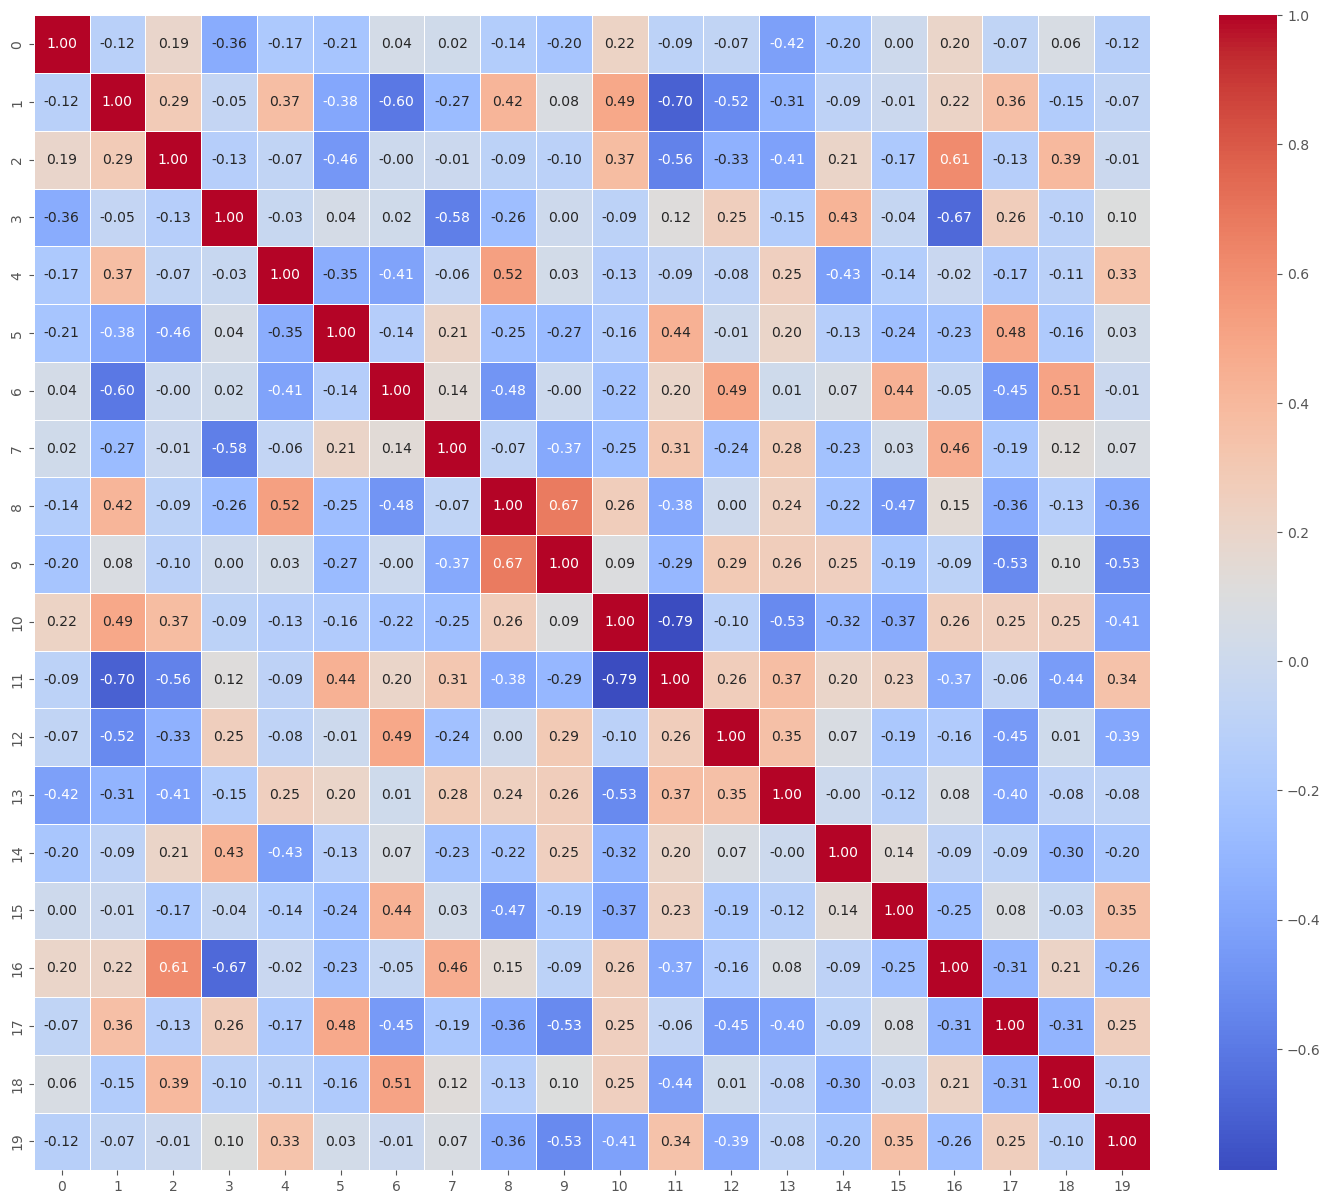

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(18,15)) 
sns.heatmap(pd.DataFrame(cosine_similarity(temp_mat_scaled)), linewidth = 0.5 , cmap = 'coolwarm', annot=True, fmt=".2f", ax = ax)

plt.show()

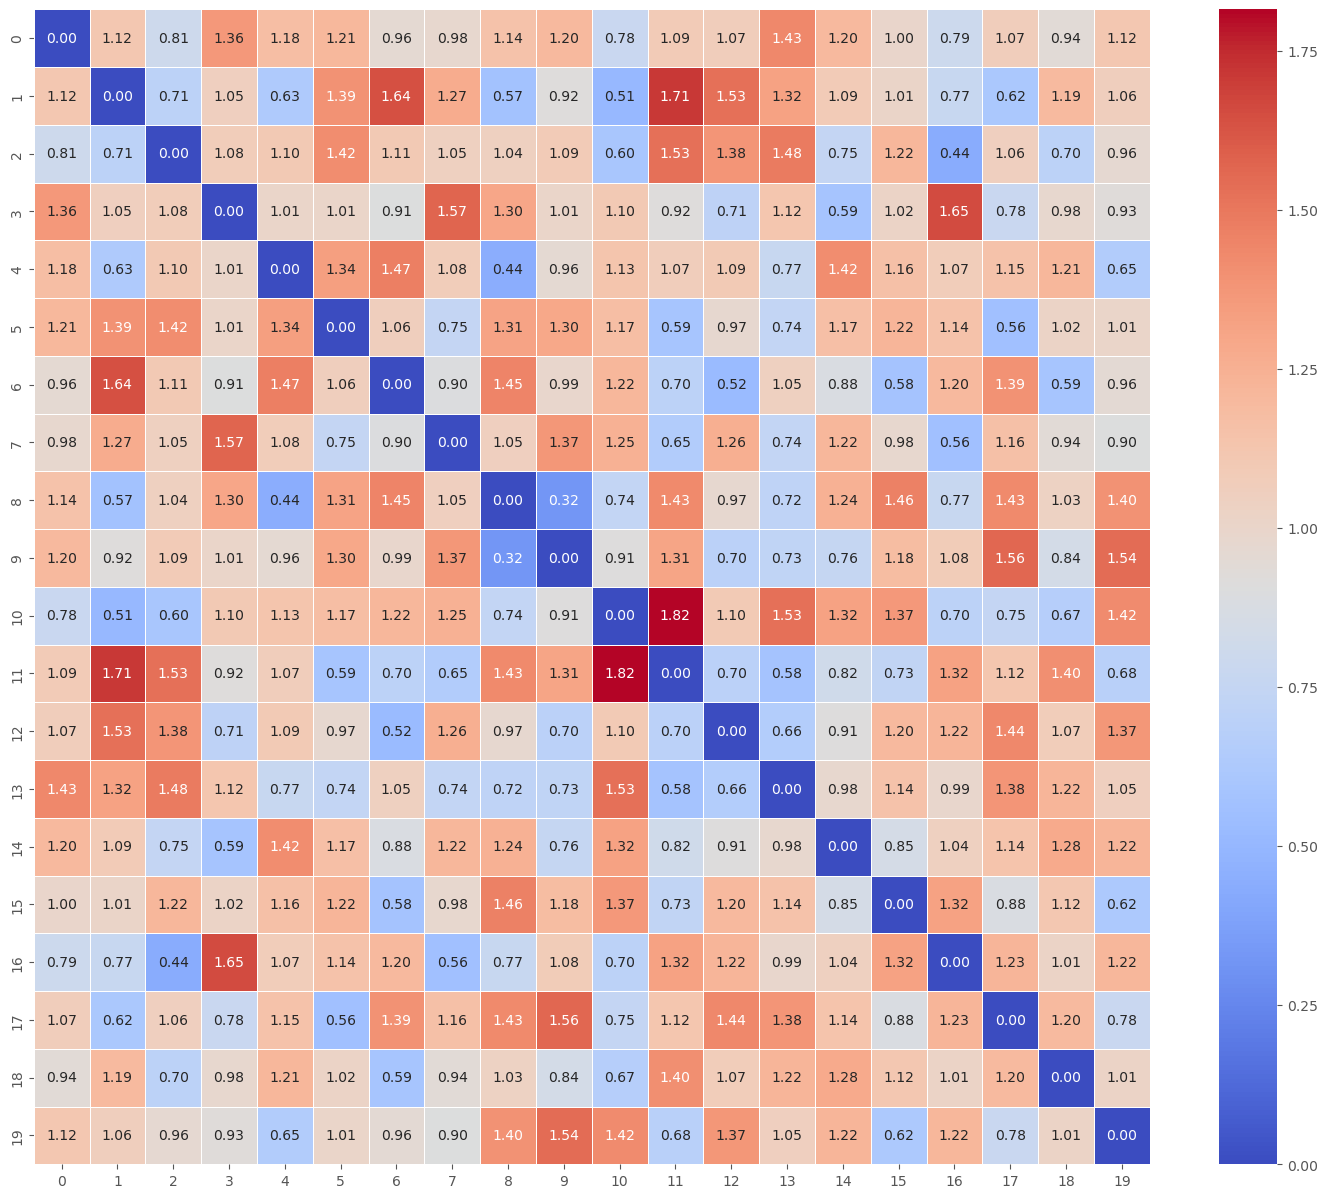

In [64]:
from scipy.spatial.distance import cdist
Y = cdist(temp_mat_scaled,temp_mat_scaled,'correlation')
fig, ax = plt.subplots(figsize=(18,15)) 
sns.heatmap(pd.DataFrame(Y), linewidth = 0.5 , cmap = 'coolwarm', annot=True, fmt=".2f", ax = ax)

plt.show()


In [69]:
temp_mat_singular = temp_mat_scaled.copy()
temp_mat_singular[0,:] = temp_mat_singular[1,:]
temp_mat_singular[2,:] = temp_mat_singular[1,:]
temp_mat_singular[3,:] = temp_mat_singular[1,:]
pd.DataFrame(temp_mat_singular)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.704980,0.544633,1.167886,0.385528,1.311127,-0.040731,-0.310148,-0.454236,0.836230,1.248712,...,-0.945452,-0.310679,0.730721,0.425920,0.388936,-0.924158,-1.283131,0.179529,-0.054107,-1.090173
1,-0.704980,0.544633,1.167886,0.385528,1.311127,-0.040731,-0.310148,-0.454236,0.836230,1.248712,...,-0.945452,-0.310679,0.730721,0.425920,0.388936,-0.924158,-1.283131,0.179529,-0.054107,-1.090173
2,-0.704980,0.544633,1.167886,0.385528,1.311127,-0.040731,-0.310148,-0.454236,0.836230,1.248712,...,-0.945452,-0.310679,0.730721,0.425920,0.388936,-0.924158,-1.283131,0.179529,-0.054107,-1.090173
3,-0.704980,0.544633,1.167886,0.385528,1.311127,-0.040731,-0.310148,-0.454236,0.836230,1.248712,...,-0.945452,-0.310679,0.730721,0.425920,0.388936,-0.924158,-1.283131,0.179529,-0.054107,-1.090173
4,-0.935282,1.411732,1.016737,0.873952,0.711922,-1.364950,-0.307563,-0.333285,1.058388,0.941670,...,0.352317,1.233840,-0.804176,-0.293255,-1.411330,0.454592,-0.261451,-1.829701,-1.040074,-0.562172
5,-0.552609,-0.641368,-0.996751,-0.113889,-0.013381,0.048229,-0.310185,-0.804422,-0.387304,-0.818925,...,-0.422738,1.273756,-0.298777,-1.357070,1.782339,2.571063,0.823258,1.306466,3.150853,2.228110
6,0.912800,-1.321923,-1.296964,-0.439485,-0.698501,0.349854,-0.310257,-0.403101,-0.546147,-1.888389,...,1.571032,-1.424585,0.386107,-0.499523,-0.924278,-0.427854,0.107278,-0.560882,-0.729718,-0.161324
7,-0.889286,0.483903,-1.821837,-0.402668,1.220015,1.256319,-0.276972,-0.377611,-0.075173,-0.964027,...,-0.638518,-0.052611,-1.333897,0.337713,0.088871,0.786482,0.932775,-0.326016,-0.591427,0.078355
8,-0.837150,2.376535,1.838204,2.472112,-0.027814,1.080994,0.435984,-0.279086,0.321935,1.404295,...,-1.027035,-0.304963,0.425750,-0.793856,-1.057037,0.256437,1.597244,-0.714983,-0.311758,-1.059241
9,0.424059,1.624782,1.450598,2.147660,-2.493904,0.760556,0.233778,-0.346505,-0.984354,0.296359,...,-0.271015,-0.699441,1.389168,-0.629780,-0.674704,-0.916663,1.396296,0.040157,0.296748,-1.771940


In [73]:
cov_mat = np.cov(temp_mat_singular)
pd.DataFrame(np.linalg.inv(cov_mat))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.907200e+31,9.610635e-01,9.610635e-01,1.907200e+31,-1.345131e+16,2.365059e+16,-5.154299e+16,3.065102e+16,3.764276e+15,-1.330756e+16,-1.862313e+16,-5.249398e+16,6.276734e+16,-3.825822e+16,8.857505e+15,3.012738e+16,-2.147700e+16,-2.766435e+16,-1.047343e+16,2.260505e+16
1,1.907200e+31,1.890543e+16,-0.000000e+00,-1.907200e+31,1.345131e+16,-2.365059e+16,5.154299e+16,-3.065102e+16,-3.764276e+15,1.330756e+16,1.862313e+16,5.249398e+16,-6.276734e+16,3.825822e+16,-8.857505e+15,-3.012738e+16,2.147700e+16,2.766435e+16,1.047343e+16,-2.260505e+16
2,2.802689e+16,-1.890543e+16,1.890543e+16,-2.802689e+16,2.120136e+00,-1.318701e+01,4.036081e+01,-2.926769e+01,6.091802e+00,-4.651355e+00,2.777374e+01,3.942234e+01,-5.574697e+01,4.287436e+01,-7.193957e-01,-2.013893e+01,3.458972e+00,7.902631e+00,-7.836085e-01,-1.055154e+01
3,8.319608e+15,-5.723239e-16,-1.890543e+16,1.058582e+16,4.594981e+00,-9.879544e+00,1.338418e+01,-8.935979e+00,8.666768e-01,8.552702e+00,8.229148e+00,2.438361e+01,-1.393350e+01,1.121638e+01,-9.608904e-01,-7.428752e+00,1.348516e+01,1.480921e+01,1.649638e+01,-3.868799e+00
4,-3.490153e+16,5.090261e-15,0.000000e+00,3.490153e+16,5.887985e+00,4.373094e+01,-7.217143e+01,6.501544e+01,-2.954338e+01,5.729303e+00,-2.632243e+01,-9.368523e+01,8.966594e+01,-6.874629e+01,9.600829e+00,3.983950e+01,-3.389719e+01,-4.616897e+01,-4.812522e+01,2.907389e+01
5,1.479586e+16,6.650696e-16,0.000000e+00,-1.479586e+16,1.088603e+01,8.162289e+00,1.356143e+01,2.300454e+00,-2.472587e+01,9.226396e+00,1.955185e+01,2.665914e+00,-2.459560e+01,1.362048e+01,-2.066122e+00,-1.000574e+01,-1.323398e+01,-1.760008e+01,-2.994987e+01,-1.580847e+00
6,-4.402460e+16,1.871004e-15,0.000000e+00,4.402460e+16,-8.898544e+00,2.816845e+01,-5.710524e+01,4.187810e+01,4.967775e+00,-9.656931e+00,-4.025273e+01,-7.485339e+01,8.311074e+01,-6.266795e+01,8.205146e+00,3.538474e+01,-1.642421e+01,-2.183447e+01,-1.621002e+01,2.260323e+01
7,-7.989582e+15,5.196304e-15,0.000000e+00,7.989582e+15,3.289481e+00,3.598681e+01,-5.046698e+01,6.227439e+01,-4.994738e+01,1.633389e+01,-3.662835e+00,-7.198139e+01,5.334051e+01,-3.888474e+01,4.369445e-01,1.671818e+01,-4.742662e+01,-5.392228e+01,-6.981639e+01,2.719020e+01
8,4.345972e+16,-9.180325e-15,-0.000000e+00,-4.345972e+16,-5.780217e+00,-7.569860e+01,1.137305e+02,-1.213693e+02,1.016837e+02,-3.199382e+01,3.104148e+01,1.566063e+02,-1.237524e+02,9.879398e+01,5.917082e+00,-3.966115e+01,8.572610e+01,1.082179e+02,1.311316e+02,-4.891583e+01
9,-4.370123e+16,6.666454e-15,0.000000e+00,4.370123e+16,-7.401041e-01,5.309505e+01,-9.704324e+01,9.214181e+01,-5.369260e+01,1.981294e+01,-3.699717e+01,-1.205911e+02,1.173274e+02,-8.981673e+01,1.168742e+00,4.193209e+01,-4.995028e+01,-6.420162e+01,-7.324092e+01,4.151159e+01


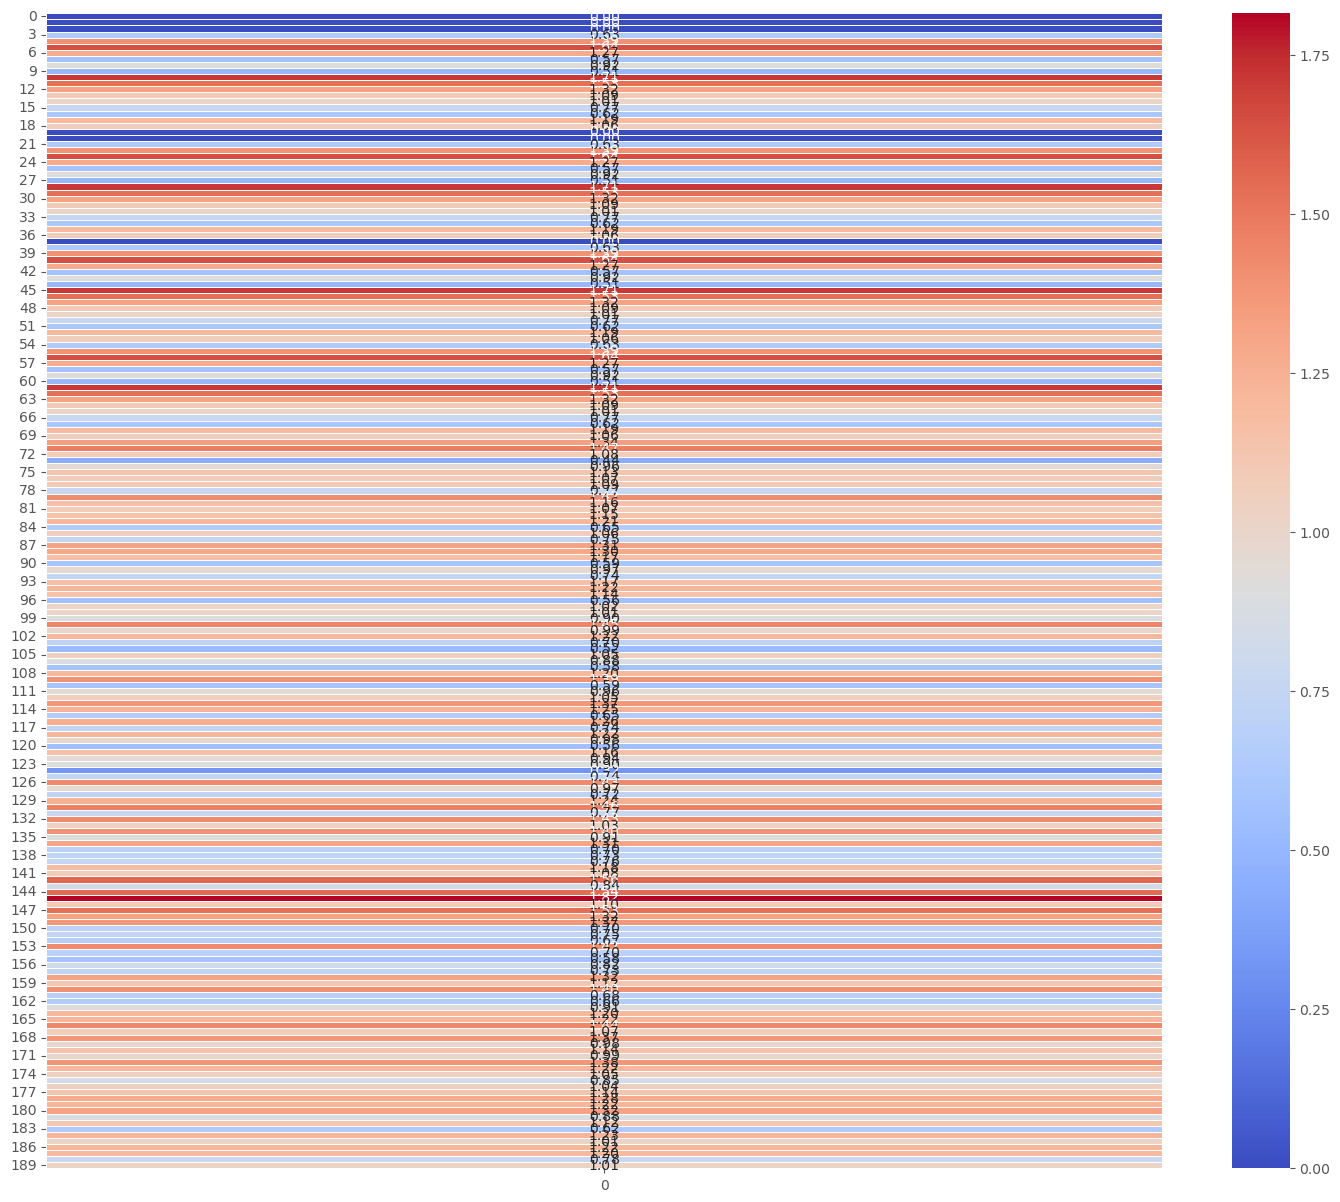

In [79]:
from scipy.spatial.distance import pdist
Y = pdist(temp_mat_singular,metric='correlation')

fig, ax = plt.subplots(figsize=(18,15)) 
sns.heatmap(pd.DataFrame(Y), linewidth = 0.5 , cmap = 'coolwarm', annot=True, fmt=".2f", ax = ax)

plt.show()

In [84]:
Y

array([1.11022302e-16, 1.11022302e-16, 1.11022302e-16, 6.33390002e-01,
       1.39361860e+00, 1.64397412e+00, 1.27392670e+00, 5.74134746e-01,
       9.19436875e-01, 5.09625237e-01, 1.71074207e+00, 1.53099065e+00,
       1.32071661e+00, 1.08735866e+00, 1.01126652e+00, 7.72774229e-01,
       6.16782067e-01, 1.19398790e+00, 1.06351704e+00, 1.11022302e-16,
       1.11022302e-16, 6.33390002e-01, 1.39361860e+00, 1.64397412e+00,
       1.27392670e+00, 5.74134746e-01, 9.19436875e-01, 5.09625237e-01,
       1.71074207e+00, 1.53099065e+00, 1.32071661e+00, 1.08735866e+00,
       1.01126652e+00, 7.72774229e-01, 6.16782067e-01, 1.19398790e+00,
       1.06351704e+00, 1.11022302e-16, 6.33390002e-01, 1.39361860e+00,
       1.64397412e+00, 1.27392670e+00, 5.74134746e-01, 9.19436875e-01,
       5.09625237e-01, 1.71074207e+00, 1.53099065e+00, 1.32071661e+00,
       1.08735866e+00, 1.01126652e+00, 7.72774229e-01, 6.16782067e-01,
       1.19398790e+00, 1.06351704e+00, 6.33390002e-01, 1.39361860e+00,
      